# Tugas Besar Machine Learning (Tahap 2)
---
1. Nama : Izzan Faikar Ramadhy
<br>NIM : 1301184216
<br>Kelas : IF-42-12

2. Nama : Reza Ahmad Yahya
<br>NIM : 1301184403
<br>Kelas : IF-42-12

## Import Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
import io
import requests
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
%config IPCompleter.greedy=True

mpl.style.use(['ggplot']) 

## Load Data

In [3]:
# Load data training salju
url = "https://raw.githubusercontent.com/RezaAYahya/Classification/main/salju_train.csv"
download = requests.get(url).content

df_train = pd.read_csv(io.StringIO(download.decode('utf-8')))
df_train.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,...,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,...,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,...,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,...,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,...,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


In [4]:
# Load data testing salju
url2 = "https://raw.githubusercontent.com/RezaAYahya/Classification/main/salju_test.csv"
download2 = requests.get(url2).content

df_test = pd.read_csv(io.StringIO(download2.decode('utf-8')))
df_test.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,...,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,...,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,...,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,...,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,...,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No


## Eksplorasi Data
1. Identifikasi Data <br>
    a. Dimensi Data <br>
    b. Info Data <br>
    c. Missing Values <br>
2. Univariate Analysis (Explore Kolom Target)
3. Bivariate Analysis
4. Multivariate Analysis

### Identifikasi Data

#### Dimensi Data

In [5]:
# Melihat jumlah baris dan kolom data train salju
df_train.shape

(109095, 24)

In [6]:
# Melihat jumlah baris dan kolom data test salju
df_test.shape

(18182, 23)

#### Info Data

In [7]:
# Melihat informasi dari data train salju
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        109095 non-null  int64  
 1   Tanggal                   109095 non-null  object 
 2   KodeLokasi                109095 non-null  object 
 3   SuhuMin                   107973 non-null  float64
 4   SuhuMax                   108166 non-null  float64
 5   Hujan                     106664 non-null  float64
 6   Penguapan                 62071 non-null   float64
 7   SinarMatahari             56716 non-null   float64
 8   ArahAnginTerkencang       101351 non-null  object 
 9   KecepatanAnginTerkencang  101399 non-null  float64
 10  ArahAngin9am              101172 non-null  object 
 11  ArahAngin3pm              105898 non-null  object 
 12  KecepatanAngin9am         107742 non-null  float64
 13  KecepatanAngin3pm         106792 non-null  f

In [8]:
# Melihat informasi dari data test salju
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tanggal                   18182 non-null  object 
 1   KodeLokasi                18182 non-null  object 
 2   SuhuMin                   18017 non-null  float64
 3   SuhuMax                   18017 non-null  float64
 4   Hujan                     17795 non-null  float64
 5   Penguapan                 10326 non-null  float64
 6   SinarMatahari             9464 non-null   float64
 7   ArahAnginTerkencang       16901 non-null  object 
 8   KecepatanAnginTerkencang  16908 non-null  float64
 9   ArahAngin9am              16874 non-null  object 
 10  ArahAngin3pm              17686 non-null  object 
 11  KecepatanAngin9am         17984 non-null  float64
 12  KecepatanAngin3pm         17828 non-null  float64
 13  Kelembaban9am             17852 non-null  float64
 14  Kelemb

#### Missing Values

In [9]:
# Mengecheck nilai null dari data train salju
df_train.isnull().sum()

id                              0
Tanggal                         0
KodeLokasi                      0
SuhuMin                      1122
SuhuMax                       929
Hujan                        2431
Penguapan                   47024
SinarMatahari               52379
ArahAnginTerkencang          7744
KecepatanAnginTerkencang     7696
ArahAngin9am                 7923
ArahAngin3pm                 3197
KecepatanAngin9am            1353
KecepatanAngin3pm            2303
Kelembaban9am                2002
Kelembaban3pm                3374
Tekanan9am                  11327
Tekanan3pm                  11308
Awan9am                     41844
Awan3pm                     44471
Suhu9am                      1340
Suhu3pm                      2698
BersaljuHariIni              2431
BersaljuBesok                2431
dtype: int64

In [10]:
df_test.isnull().sum()

Tanggal                        0
KodeLokasi                     0
SuhuMin                      165
SuhuMax                      165
Hujan                        387
Penguapan                   7856
SinarMatahari               8718
ArahAnginTerkencang         1281
KecepatanAnginTerkencang    1274
ArahAngin9am                1308
ArahAngin3pm                 496
KecepatanAngin9am            198
KecepatanAngin3pm            354
Kelembaban9am                330
Kelembaban3pm                548
Tekanan9am                  1865
Tekanan3pm                  1853
Awan9am                     7042
Awan3pm                     7456
Suhu9am                      219
Suhu3pm                      442
BersaljuHariIni              387
BersaljuBesok                419
dtype: int64

### Univariate Analysis
> Explore kolom target (BersaljuBesok)
1. Check Missing Values
2. Check Unique Values
3. Check Distribusi Data

#### Missing Values

In [11]:
df_train['BersaljuBesok'].isnull().sum()

2431

Terdapat 2431 missing values pada data train.

In [12]:
# Handling Missing values
modus = df_train['BersaljuBesok'].mode()
df_train['BersaljuBesok'].fillna(modus[0], inplace=True)
df_train['BersaljuBesok'].isnull().sum()

0

In [13]:
df_test['BersaljuBesok'].isnull().sum()

419

Terdapat 419 missing values pada data test.

In [14]:
# Handling Missing values
modus = df_test['BersaljuBesok'].mode()
df_test['BersaljuBesok'].fillna(modus[0], inplace=True)
df_test['BersaljuBesok'].isnull().sum()

0

#### Unique Values

In [15]:
df_train['BersaljuBesok'].unique()

array(['Tidak', 'Ya'], dtype=object)

In [16]:
df_test['BersaljuBesok'].unique()

array(['No', 'Yes'], dtype=object)

Data class pada training dan testing masih belum konsisten nilainya, pada data train nilainya adalah 'Tidak' dan 'Ya' sedangkan pada data test nilainya adalah 'No' dan 'Yes'.

In [17]:
df_train['BersaljuBesok'].replace({'Tidak': 0, 'Ya': 1},inplace = True)
df_test['BersaljuBesok'].replace({'No': 0, 'Yes': 1},inplace = True)

Convert 'Ya' dan 'Tidak' ke binary 1/0.

In [18]:
df_train['BersaljuBesok'].unique()

array([0, 1], dtype=int64)

In [19]:
df_test['BersaljuBesok'].unique()

array([0, 1], dtype=int64)

Nilai pada masing-masing data telah sama.

#### Distribusi Data

In [20]:
df_train['BersaljuBesok'].value_counts()

0    85132
1    23963
Name: BersaljuBesok, dtype: int64

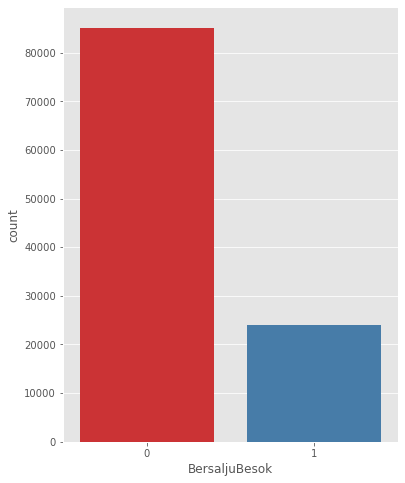

In [21]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="BersaljuBesok", data=df_train, palette="Set1")
plt.show()

Kolom target pada data training masih imbalance.

### Bivariate Analysis
1. Datetime
2. Categorical
3. Numerical

In [22]:
# Melihat tipe data dari data train salju
df_train.dtypes

id                            int64
Tanggal                      object
KodeLokasi                   object
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang          object
KecepatanAnginTerkencang    float64
ArahAngin9am                 object
ArahAngin3pm                 object
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni              object
BersaljuBesok                 int64
dtype: object

In [23]:
# Melihat tipe data dari data train salju
df_test.dtypes

Tanggal                      object
KodeLokasi                   object
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang          object
KecepatanAnginTerkencang    float64
ArahAngin9am                 object
ArahAngin3pm                 object
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni              object
BersaljuBesok                 int64
dtype: object

#### Datetime

In [24]:
# Merubah type data tanggal menjadi date
df_train['Tanggal'] = pd.to_datetime(df_train['Tanggal'])
df_test['Tanggal'] = pd.to_datetime(df_test['Tanggal'])

#### Tahun

In [25]:
# Convert tanggal menjadi satuan tahun di data train salju
df_train['Tahun'] = df_train['Tanggal'].dt.year
df_train['Tahun'].head()

0    2014
1    2014
2    2011
3    2012
4    2016
Name: Tahun, dtype: int64

In [26]:
# Convert tanggal menjadi satuan tahun di data test salju
df_test['Tahun'] = df_test['Tanggal'].dt.year
df_test['Tahun'].head()

0    2010
1    2015
2    2016
3    2011
4    2017
Name: Tahun, dtype: int64

#### Bulan

In [27]:
# Convert tanggal menjadi satuan bulan di data train salju
df_train['Bulan'] = df_train['Tanggal'].dt.month
df_train['Bulan'].head()

0     1
1     7
2     2
3     8
4    10
Name: Bulan, dtype: int64

In [28]:
# Convert tanggal menjadi satuan bulan di data test salju
df_test['Bulan'] = df_test['Tanggal'].dt.month
df_test['Bulan'].head()

0    4
1    3
2    3
3    9
4    5
Name: Bulan, dtype: int64

#### Hari

In [29]:
# Convert tanggal menjadi satuan hari di data train salju
df_train['Hari'] = df_train['Tanggal'].dt.day
df_train['Hari'].head()

0     6
1    15
2    16
3     8
4    29
Name: Hari, dtype: int64

In [30]:
# Convert tanggal menjadi satuan hari di data train salju
df_test['Hari'] = df_test['Tanggal'].dt.day
df_test['Hari'].head()

0    11
1    26
2    22
3    12
4    20
Name: Hari, dtype: int64

#### Drop Feature

In [31]:
# Drop kolom dari data train dan data test
df_train.drop(['id', 'Tanggal'], axis=1, inplace = True)
df_test.drop(['Tanggal'], axis=1, inplace = True)

#### Categorical

In [32]:
# Melihat data yang bertipe kategorical di data train salju
categorical_train = [var for var in df_train.columns if df_train[var].dtype=='O']
print('Terdapat {} categorical variables di data train salju\n'.format(len(categorical_train)))
print('Contohnya adalah :', categorical_train)

Terdapat 5 categorical variables di data train salju

Contohnya adalah : ['KodeLokasi', 'ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm', 'BersaljuHariIni']


In [33]:
# Melihat data yang bertipe kategorical di data test salju
categorical_test = [var for var in df_test.columns if df_test[var].dtype=='O']
print('Terdapat {} categorical variables di data test salju\n'.format(len(categorical_test)))
print('Contohnya adalah :', categorical_test)

Terdapat 5 categorical variables di data test salju

Contohnya adalah : ['KodeLokasi', 'ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm', 'BersaljuHariIni']


#### Numerical

In [34]:
# Melihat data yang bertipe numerical di data train salju
numerical_train = [var for var in df_train.columns if df_train[var].dtype!='O']
print('Terdapat {} numerical variables di data train salju\n'.format(len(numerical_train)))
print('Contohnya adalah :', numerical_train)

Terdapat 20 numerical variables di data train salju

Contohnya adalah : ['SuhuMin', 'SuhuMax', 'Hujan', 'Penguapan', 'SinarMatahari', 'KecepatanAnginTerkencang', 'KecepatanAngin9am', 'KecepatanAngin3pm', 'Kelembaban9am', 'Kelembaban3pm', 'Tekanan9am', 'Tekanan3pm', 'Awan9am', 'Awan3pm', 'Suhu9am', 'Suhu3pm', 'BersaljuBesok', 'Tahun', 'Bulan', 'Hari']


In [35]:
# Melihat data yang bertipe numerical di data test salju
numerical_test = [var for var in df_test.columns if df_test[var].dtype!='O']
print('Terdapat {} numerical variables di data test salju\n'.format(len(numerical_test)))
print('Contohnya adalah :', numerical_test)

Terdapat 20 numerical variables di data test salju

Contohnya adalah : ['SuhuMin', 'SuhuMax', 'Hujan', 'Penguapan', 'SinarMatahari', 'KecepatanAnginTerkencang', 'KecepatanAngin9am', 'KecepatanAngin3pm', 'Kelembaban9am', 'Kelembaban3pm', 'Tekanan9am', 'Tekanan3pm', 'Awan9am', 'Awan3pm', 'Suhu9am', 'Suhu3pm', 'BersaljuBesok', 'Tahun', 'Bulan', 'Hari']


### Multivariate Analysis

In [36]:
korelasi = df_train.select_dtypes(include = ['float64']).iloc[:, :].corr()
korelasi

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
SuhuMin,1.000000,0.735500,0.104391,0.465508,0.072501,0.177627,0.174358,0.174122,-0.232101,0.007974,-0.449684,-0.459596,0.077349,0.021105,0.901208,0.707578
SuhuMax,0.735500,1.000000,-0.074669,0.585475,0.470991,0.068244,0.013632,0.050793,-0.504014,-0.507921,-0.331431,-0.426012,-0.291573,-0.279039,0.886984,0.984434
Hujan,0.104391,-0.074669,1.000000,-0.058940,-0.226845,0.135081,0.087157,0.059562,0.223661,0.254898,-0.168638,-0.127506,0.195540,0.170791,0.011781,-0.079160
Penguapan,0.465508,0.585475,-0.058940,1.000000,0.364745,0.198965,0.188950,0.128217,-0.499698,-0.387161,-0.268648,-0.291740,-0.181615,-0.181563,0.542808,0.570758
SinarMatahari,0.072501,0.470991,-0.226845,0.364745,1.000000,-0.035040,0.002004,0.051812,-0.489242,-0.627920,0.041321,-0.020052,-0.676965,-0.703482,0.291601,0.490993
KecepatanAnginTerkencang,0.177627,0.068244,0.135081,0.198965,-0.035040,1.000000,0.604677,0.686629,-0.214062,-0.026049,-0.460665,-0.415953,0.071323,0.105835,0.150043,0.033001
KecepatanAngin9am,0.174358,0.013632,0.087157,0.188950,0.002004,0.604677,1.000000,0.518093,-0.272566,-0.032366,-0.229197,-0.176461,0.024425,0.051593,0.127675,0.004132
KecepatanAngin3pm,0.174122,0.050793,0.059562,0.128217,0.051812,0.686629,0.518093,1.000000,-0.144640,0.016263,-0.298189,-0.257869,0.050446,0.023239,0.162047,0.027859
Kelembaban9am,-0.232101,-0.504014,0.223661,-0.499698,-0.489242,-0.214062,-0.272566,-0.144640,1.000000,0.667101,0.138628,0.185534,0.452897,0.356101,-0.471206,-0.498840
Kelembaban3pm,0.007974,-0.507921,0.254898,-0.387161,-0.627920,-0.026049,-0.032366,0.016263,0.667101,1.000000,-0.028295,0.050983,0.517553,0.523358,-0.219775,-0.557240


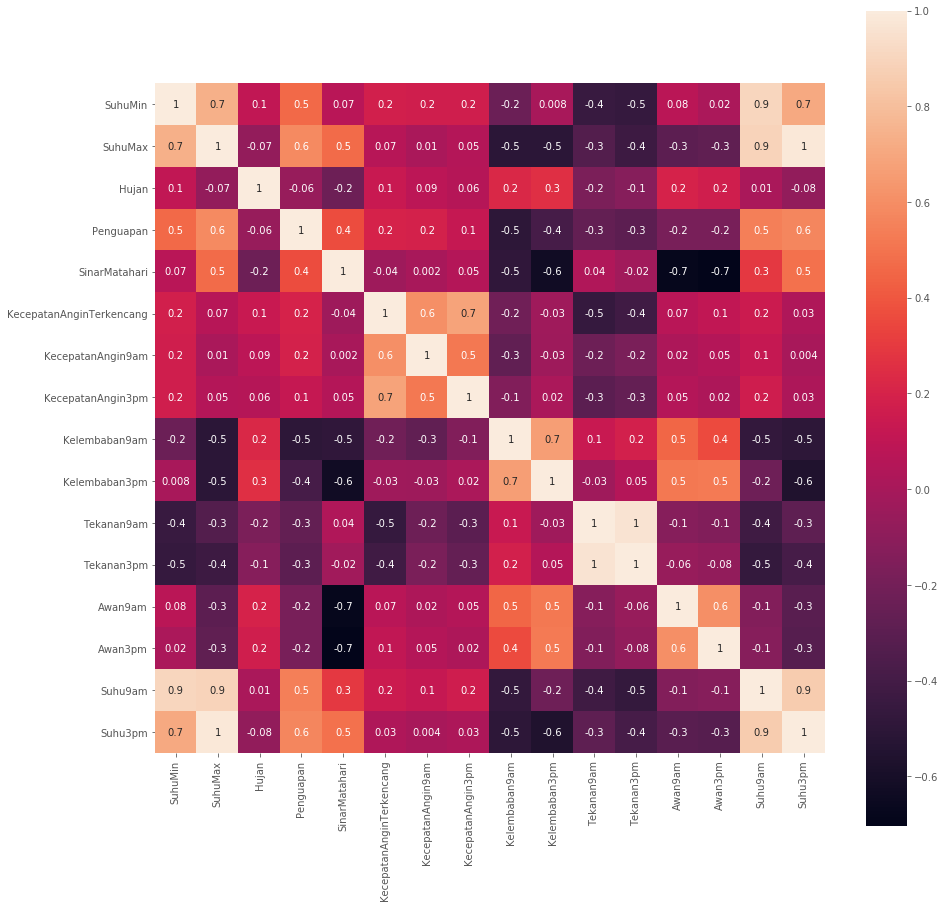

In [37]:
# Visualisasi korelasi
plt.figure(figsize=(15, 15))
sns.heatmap(korelasi, vmax=1, square=True, fmt='.1g', annot=True)
plt.show()

## Preprocessing
1. Handling Class Imbalance
2. Handling Datetime
3. Handling missing values
4. Handling outliers

### Handling Class Imbalance

In [38]:
from sklearn.utils import resample

tidak = df_train[df_train.BersaljuBesok == 0]
ya = df_train[df_train.BersaljuBesok == 1]
ya_oversampled = resample(ya, replace=True, n_samples=len(tidak), random_state=123)
oversampled = pd.concat([tidak, ya_oversampled])

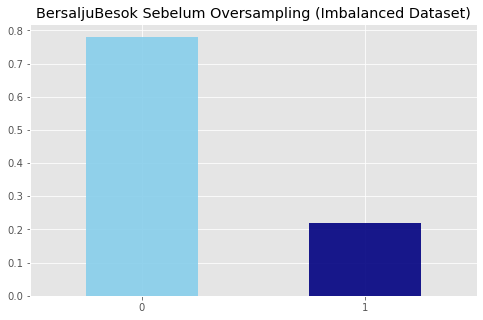

In [39]:
fig = plt.figure(figsize = (8,5))
df_train.BersaljuBesok.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('BersaljuBesok Sebelum Oversampling (Imbalanced Dataset)')
plt.show()

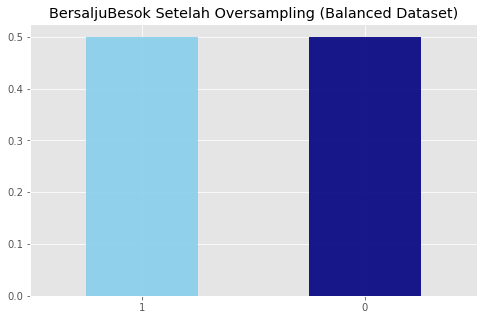

In [40]:
fig = plt.figure(figsize = (8,5))
oversampled.BersaljuBesok.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('BersaljuBesok Setelah Oversampling (Balanced Dataset)')
plt.show()

In [41]:
oversampled.reset_index(drop=True, inplace=True)
df_train = oversampled.copy()

### Handling Missing Values

In [42]:
# Categorical Train
df_train[categorical_train].isnull().sum()

KodeLokasi                 0
ArahAnginTerkencang    12498
ArahAngin9am           11517
ArahAngin3pm            5170
BersaljuHariIni         3696
dtype: int64

In [43]:
# Categorical Test
df_test[categorical_test].isnull().sum()

KodeLokasi                0
ArahAnginTerkencang    1281
ArahAngin9am           1308
ArahAngin3pm            496
BersaljuHariIni         387
dtype: int64

In [44]:
for feature in categorical_train:
    if feature != 'KodeLokasi':
        modus_train = df_train[feature].mode()
        modus_test = df_test[feature].mode()
        df_train[feature].fillna(modus_train[0], inplace=True)
        df_test[feature].fillna(modus_test[0], inplace=True)

In [45]:
# Numerical Train
df_train[numerical_train].isnull().sum()

SuhuMin                      1434
SuhuMax                      1060
Hujan                        3696
Penguapan                   73480
SinarMatahari               80868
KecepatanAnginTerkencang    12399
KecepatanAngin9am            1950
KecepatanAngin3pm            3530
Kelembaban9am                2995
Kelembaban3pm                5234
Tekanan9am                  17335
Tekanan3pm                  17363
Awan9am                     63116
Awan3pm                     66407
Suhu9am                      1858
Suhu3pm                      4083
BersaljuBesok                   0
Tahun                           0
Bulan                           0
Hari                            0
dtype: int64

In [46]:
# Numerical Train
df_test[numerical_test].isnull().sum()

SuhuMin                      165
SuhuMax                      165
Hujan                        387
Penguapan                   7856
SinarMatahari               8718
KecepatanAnginTerkencang    1274
KecepatanAngin9am            198
KecepatanAngin3pm            354
Kelembaban9am                330
Kelembaban3pm                548
Tekanan9am                  1865
Tekanan3pm                  1853
Awan9am                     7042
Awan3pm                     7456
Suhu9am                      219
Suhu3pm                      442
BersaljuBesok                  0
Tahun                          0
Bulan                          0
Hari                           0
dtype: int64

In [47]:
for feature in numerical_train:
    if feature != 'BersaljuBesok' and feature != 'Tahun' and feature != 'Bulan' and feature != 'Hari':
        mean_train = int(df_train[feature].mean(skipna=True))
        mean_test = int(df_test[feature].mean(skipna=True))
        df_test[feature].fillna(mean_test, inplace=True)
        df_train[feature].fillna(mean_train, inplace=True)

In [48]:
df_train.isna().any()

KodeLokasi                  False
SuhuMin                     False
SuhuMax                     False
Hujan                       False
Penguapan                   False
SinarMatahari               False
ArahAnginTerkencang         False
KecepatanAnginTerkencang    False
ArahAngin9am                False
ArahAngin3pm                False
KecepatanAngin9am           False
KecepatanAngin3pm           False
Kelembaban9am               False
Kelembaban3pm               False
Tekanan9am                  False
Tekanan3pm                  False
Awan9am                     False
Awan3pm                     False
Suhu9am                     False
Suhu3pm                     False
BersaljuHariIni             False
BersaljuBesok               False
Tahun                       False
Bulan                       False
Hari                        False
dtype: bool

In [49]:
df_test.isna().any()

KodeLokasi                  False
SuhuMin                     False
SuhuMax                     False
Hujan                       False
Penguapan                   False
SinarMatahari               False
ArahAnginTerkencang         False
KecepatanAnginTerkencang    False
ArahAngin9am                False
ArahAngin3pm                False
KecepatanAngin9am           False
KecepatanAngin3pm           False
Kelembaban9am               False
Kelembaban3pm               False
Tekanan9am                  False
Tekanan3pm                  False
Awan9am                     False
Awan3pm                     False
Suhu9am                     False
Suhu3pm                     False
BersaljuHariIni             False
BersaljuBesok               False
Tahun                       False
Bulan                       False
Hari                        False
dtype: bool

Missing values telah dihandle.

### Handling Outliers
1. Data Training
2. Data Test

In [50]:
def max_value(df, variable, top):
    return np.where(df[variable]>top, top, df[variable])

#### Data Training

In [51]:
print(round(df_train[numerical_train].describe()),2)

        SuhuMin   SuhuMax     Hujan  Penguapan  SinarMatahari  \
count  170264.0  170264.0  170264.0   170264.0       170264.0   
mean       13.0      22.0       4.0        5.0            6.0   
std         6.0       7.0      11.0        3.0            3.0   
min        -8.0      -5.0       0.0        0.0            0.0   
25%         8.0      17.0       0.0        4.0            6.0   
50%        12.0      22.0       0.0        5.0            6.0   
75%        17.0      27.0       3.0        5.0            7.0   
max        34.0      47.0     371.0      145.0           14.0   

       KecepatanAnginTerkencang  KecepatanAngin9am  KecepatanAngin3pm  \
count                  170264.0           170264.0           170264.0   
mean                       42.0               15.0               19.0   
std                        14.0                9.0                9.0   
min                         7.0                0.0                0.0   
25%                        33.0                7.

Bisa dilihat atribut **Hujan**, **Penguapan**, **KecepatanAngin3pm**, dan **KecepatanAngin9am** ada kemungkinan memiliki outliers karena nilai maxnya dengan mean terlalu jauh jaraknya.

Text(0, 0.5, 'KecepatanAngin9am')

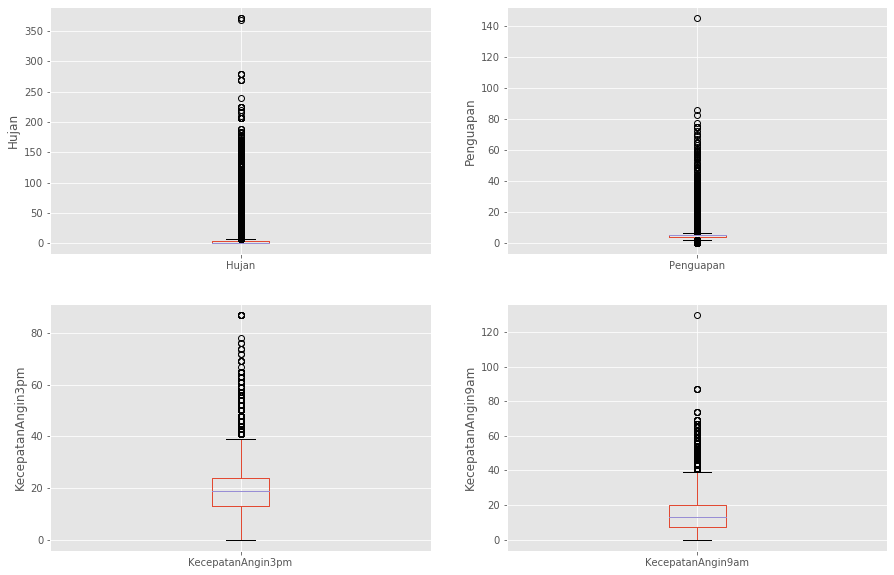

In [52]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df_train.boxplot(column='Hujan')
fig.set_title('')
fig.set_ylabel('Hujan')


plt.subplot(2, 2, 2)
fig = df_train.boxplot(column='Penguapan')
fig.set_title('')
fig.set_ylabel('Penguapan')


plt.subplot(2, 2, 3)
fig = df_train.boxplot(column='KecepatanAngin3pm')
fig.set_title('')
fig.set_ylabel('KecepatanAngin3pm')


plt.subplot(2, 2, 4)
fig = df_train.boxplot(column='KecepatanAngin9am')
fig.set_title('')
fig.set_ylabel('KecepatanAngin9am')

Dari boxplot terlihat bahwa keempat atribut tersebut memiliki outliers.

In [53]:
num_outliers = ['Hujan', 'Penguapan', 'KecepatanAngin9am', 'KecepatanAngin3pm']
for feature in num_outliers:
    IQR = df_train[feature].quantile(0.75) - df_train[feature].quantile(0.25)
    Lower_fence = df_train[feature].quantile(0.25) - (IQR * 3)
    Upper_fence = df_train[feature].quantile(0.75) + (IQR * 3)
    print('Nilai outliers {column} adalah < {lowerboundary} or > {upperboundary}'.format(column=feature, lowerboundary=Lower_fence, upperboundary=Upper_fence))

Nilai outliers Hujan adalah < -8.399999999999999 or > 11.2
Nilai outliers Penguapan adalah < 0.1999999999999993 or > 8.600000000000001
Nilai outliers KecepatanAngin9am adalah < -32.0 or > 59.0
Nilai outliers KecepatanAngin3pm adalah < -20.0 or > 57.0


Nilai diatas adalah nilai Upper dan Lower **Outer** Fence dari atribut yang memiliki outliers.

In [54]:
df_train['Hujan'] = max_value(df_train, 'Hujan', 11.2)
df_train['Penguapan'] = max_value(df_train, 'Penguapan', 8.6)
df_train['KecepatanAngin9am'] = max_value(df_train, 'KecepatanAngin9am', 59)
df_train['KecepatanAngin3pm'] = max_value(df_train, 'KecepatanAngin3pm', 57)

#### Data Testing

In [55]:
print(round(df_test[numerical_test].describe()),2)

       SuhuMin  SuhuMax    Hujan  Penguapan  SinarMatahari  \
count  18182.0  18182.0  18182.0    18182.0        18182.0   
mean      12.0     23.0      2.0        5.0            7.0   
std        6.0      7.0      8.0        3.0            3.0   
min       -8.0     -2.0      0.0        0.0            0.0   
25%        8.0     18.0      0.0        4.0            7.0   
50%       12.0     23.0      0.0        5.0            7.0   
75%       17.0     28.0      1.0        5.0            9.0   
max       31.0     48.0    247.0       69.0           14.0   

       KecepatanAnginTerkencang  KecepatanAngin9am  KecepatanAngin3pm  \
count                   18182.0            18182.0            18182.0   
mean                       40.0               14.0               19.0   
std                        13.0                9.0                9.0   
min                         6.0                0.0                0.0   
25%                        31.0                7.0               13.0   
50%

Bisa dilihat atribut **Hujan**, **Penguapan**, **KecepatanAngin3pm**, dan **KecepatanAngin9am** ada kemungkinan memiliki outliers karena nilai maxnya dengan mean terlalu jauh jaraknya.

Text(0, 0.5, 'KecepatanAngin9am')

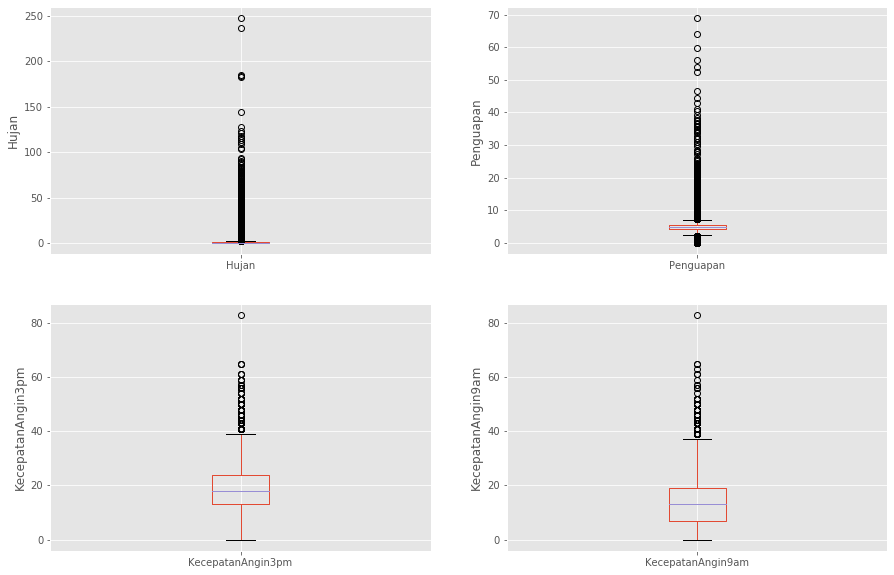

In [56]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df_test.boxplot(column='Hujan')
fig.set_title('')
fig.set_ylabel('Hujan')


plt.subplot(2, 2, 2)
fig = df_test.boxplot(column='Penguapan')
fig.set_title('')
fig.set_ylabel('Penguapan')


plt.subplot(2, 2, 3)
fig = df_test.boxplot(column='KecepatanAngin3pm')
fig.set_title('')
fig.set_ylabel('KecepatanAngin3pm')


plt.subplot(2, 2, 4)
fig = df_test.boxplot(column='KecepatanAngin9am')
fig.set_title('')
fig.set_ylabel('KecepatanAngin9am')

Dari boxplot terlihat bahwa keempat atribut tersebut memiliki outliers.

In [57]:
num_outliers = ['Hujan', 'Penguapan', 'KecepatanAngin9am', 'KecepatanAngin3pm']
for feature in num_outliers:
    IQR = df_test[feature].quantile(0.75) - df_test[feature].quantile(0.25)
    Lower_fence = df_test[feature].quantile(0.25) - (IQR * 3)
    Upper_fence = df_test[feature].quantile(0.75) + (IQR * 3)
    print('Nilai outliers {column} adalah < {lowerboundary} or > {upperboundary}'.format(column=feature, lowerboundary=Lower_fence, upperboundary=Upper_fence))

Nilai outliers Hujan adalah < -3.0 or > 4.0
Nilai outliers Penguapan adalah < 0.5999999999999996 or > 9.0
Nilai outliers KecepatanAngin9am adalah < -29.0 or > 55.0
Nilai outliers KecepatanAngin3pm adalah < -20.0 or > 57.0


Nilai diatas adalah nilai Upper dan Lower **Outer** Fence dari atribut yang memiliki outliers.

In [58]:
df_test['Hujan'] = max_value(df_test, 'Hujan', 4)
df_test['Penguapan'] = max_value(df_test, 'Penguapan', 9)
df_test['KecepatanAngin9am'] = max_value(df_test, 'KecepatanAngin9am', 55)
df_test['KecepatanAngin3pm'] = max_value(df_test, 'KecepatanAngin3pm', 57)

In [59]:
df_train.describe()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuBesok,Tahun,Bulan,Hari
count,170264.000000,170264.000000,170264.000000,170264.000000,170264.000000,170264.000000,170264.000000,170264.000000,170264.000000,170264.000000,170264.000000,170264.000000,170264.000000,170264.000000,170264.000000,170264.000000,170264.000000,170264.000000,170264.000000,170264.000000
mean,12.532572,22.436198,2.141621,4.791884,6.241552,42.169537,14.607944,19.202415,72.148499,57.774362,1016.429215,1014.173244,5.042487,5.124753,16.855265,20.744339,0.500000,2012.738036,6.451440,15.749013
std,6.349268,7.072702,3.665111,1.961501,2.859395,14.224445,9.160048,9.114112,18.360190,21.475354,6.981303,6.922607,2.197844,2.043858,6.402578,6.838690,0.500001,2.536960,3.402407,8.818376
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.200000,-5.400000,0.000000,2007.000000,1.000000,1.000000
25%,8.000000,17.200000,0.000000,3.800000,6.000000,33.000000,7.000000,13.000000,61.000000,43.000000,1012.300000,1009.900000,5.000000,5.000000,12.200000,15.800000,0.000000,2011.000000,4.000000,8.000000
50%,12.200000,21.800000,0.000000,5.000000,6.000000,41.000000,13.000000,19.000000,73.000000,58.000000,1016.000000,1014.000000,5.000000,5.000000,16.400000,20.000000,0.500000,2013.000000,6.000000,16.000000
75%,17.200000,27.300000,2.800000,5.000000,7.100000,50.000000,20.000000,24.000000,87.000000,73.000000,1020.800000,1018.500000,7.000000,7.000000,21.300000,25.300000,1.000000,2015.000000,9.000000,23.000000
max,33.900000,47.300000,11.200000,8.600000,14.300000,135.000000,59.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,2017.000000,12.000000,31.000000


In [60]:
df_test.describe()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuBesok,Tahun,Bulan,Hari
count,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000
mean,12.231042,23.292922,0.812067,4.990727,7.327995,39.905841,13.956935,18.570289,68.777307,51.425586,1017.504048,1015.162611,4.275602,4.293972,17.048356,21.755582,0.216643,2012.779452,6.424266,15.574469
std,6.403833,7.124486,1.419686,2.036255,2.756909,13.012771,8.756863,8.643314,18.984231,20.483514,6.772925,6.702776,2.273233,2.107419,6.485144,6.893782,0.411969,2.551376,3.439253,8.830499
min,-7.600000,-2.500000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,2.000000,1.000000,982.300000,984.500000,0.000000,0.000000,-5.200000,-3.700000,0.000000,2007.000000,1.000000,1.000000
25%,7.700000,18.000000,0.000000,4.200000,7.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1010.900000,3.000000,4.000000,12.400000,16.800000,0.000000,2011.000000,3.000000,8.000000
50%,12.000000,22.800000,0.000000,5.000000,7.000000,39.000000,13.000000,18.000000,69.000000,51.000000,1017.000000,1015.000000,4.000000,4.000000,16.900000,21.000000,0.000000,2013.000000,6.000000,16.000000
75%,16.900000,28.300000,1.000000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.700000,1019.300000,6.000000,6.000000,21.600000,26.400000,0.000000,2015.000000,9.000000,23.000000
max,31.400000,48.100000,4.000000,9.000000,14.500000,122.000000,55.000000,57.000000,100.000000,100.000000,1040.600000,1038.400000,8.000000,8.000000,37.700000,46.100000,1.000000,2017.000000,12.000000,31.000000


Outliers telah dihandle.

### Encode Data

In [67]:
# Merubah semua data categorical menjadi numerical di data train salju
labelencoder = LabelEncoder()
df_train['KodeLokasi'] = labelencoder.fit_transform(df_train['KodeLokasi'])
df_train['ArahAnginTerkencang'] = labelencoder.fit_transform(df_train['ArahAnginTerkencang'])
df_train['ArahAngin9am'] = labelencoder.fit_transform(df_train['ArahAngin9am'])
df_train['ArahAngin3pm'] = labelencoder.fit_transform(df_train['ArahAngin3pm'])
df_train['BersaljuHariIni'] = labelencoder.fit_transform(df_train['BersaljuHariIni'])

In [68]:
df_train.dtypes

KodeLokasi                    int32
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang           int32
KecepatanAnginTerkencang    float64
ArahAngin9am                  int32
ArahAngin3pm                  int32
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni               int32
BersaljuBesok                 int64
Tahun                         int64
Bulan                         int64
Hari                          int64
dtype: object

In [69]:
# Merubah semua data categorical menjadi numerical di data test salju
df_test['KodeLokasi'] = labelencoder.fit_transform(df_test['KodeLokasi'])
df_test['ArahAnginTerkencang'] = labelencoder.fit_transform(df_test['ArahAnginTerkencang'])
df_test['ArahAngin9am'] = labelencoder.fit_transform(df_test['ArahAngin9am'])
df_test['ArahAngin3pm'] = labelencoder.fit_transform(df_test['ArahAngin3pm'])
df_test['BersaljuHariIni'] = labelencoder.fit_transform(df_test['BersaljuHariIni'])

In [70]:
df_test.dtypes

KodeLokasi                    int32
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang           int32
KecepatanAnginTerkencang    float64
ArahAngin9am                  int32
ArahAngin3pm                  int32
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni               int32
BersaljuBesok                 int64
Tahun                         int64
Bulan                         int64
Hari                          int64
dtype: object

In [71]:
# Normalisasi data train dengan menggunakan min-max normalization
df_train = (df_train - df_train.min()) / (df_train.max() - df_train.min())
df_train.head(5)

,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,...,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok,Tahun,Bulan,Hari
0,0.687500,0.445755,0.389635,0.428571,0.581395,0.419580,1.000000,0.132812,0.2,1.000000,...,0.656352,0.555556,0.555556,0.428270,0.391555,1.0,0.0,0.7,0.000000,0.166667
1,0.833333,0.629717,0.706334,0.000000,0.581395,0.419580,0.133333,0.289062,0.6,0.600000,...,0.583062,0.555556,0.555556,0.654008,0.671785,0.0,0.0,0.4,0.090909,0.500000
2,0.604167,0.372642,0.562380,0.000000,0.976744,0.727273,0.733333,0.367188,0.2,0.800000,...,0.630293,0.111111,0.777778,0.474684,0.548944,0.0,0.0,0.5,0.636364,0.233333
3,0.958333,0.339623,0.481766,0.000000,0.418605,0.881119,0.200000,0.234375,0.4,0.133333,...,0.594463,0.222222,0.666667,0.413502,0.451056,0.0,0.0,0.9,0.818182,0.933333
4,0.062500,0.540094,0.510557,0.000000,0.372093,0.307692,0.800000,0.250000,0.8,0.733333,...,0.558632,0.777778,0.777778,0.504219,0.508637,0.0,0.0,0.4,1.000000,0.166667


In [72]:
# Normalisasi data test dengan menggunakan min-max normalization
df_test = (df_test - df_test.min()) / (df_test.max() - df_test.min())
df_test.head(5)

,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,...,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok,Tahun,Bulan,Hari
0,0.666667,0.476923,0.592885,0.00,0.555556,0.441379,1.000000,0.344828,0.866667,0.866667,...,0.517625,0.500,0.875,0.720280,0.548193,0.0,0.0,0.3,0.272727,0.333333
1,0.583333,0.451282,0.442688,0.05,0.555556,0.482759,0.933333,0.431034,0.866667,0.466667,...,0.569573,1.000,0.125,0.370629,0.453815,0.0,1.0,0.8,0.181818,0.833333
2,0.187500,0.430769,0.586957,0.00,0.577778,0.717241,0.733333,0.232759,0.266667,0.200000,...,0.578850,0.000,0.125,0.445221,0.602410,0.0,0.0,0.9,0.181818,0.700000
3,0.500000,0.648718,0.583004,0.00,0.511111,0.462069,0.800000,0.250000,0.000000,0.666667,...,0.447124,0.875,0.750,0.641026,0.604418,0.0,0.0,0.4,0.727273,0.366667
4,0.104167,0.253846,0.205534,1.00,0.555556,0.482759,0.466667,0.344828,0.866667,0.933333,...,0.565863,0.500,0.500,0.223776,0.194779,1.0,0.0,1.0,0.363636,0.633333
